# Análise Exploratória de Dados e Identificação de Outliers em Produtos de Moda no E-commerce  

Fonte de dados: https://www.kaggle.com/datasets/poorveshchaudhari/amazon-fashion-products


Este estudo utiliza um conjunto de dados de produtos de moda extraído de plataformas de e-commerce para investigar os fatores que influenciam a precificação e a percepção de qualidade dos consumidores, além de explorar técnicas de análise de dados aplicadas à detecção de padrões e anomalias.  

O dataset contém aproximadamente **13 mil registros** e **8 variáveis**, incluindo:  

- **Metadados do produto** (identificador, marca, título, categoria).  
- **Atributos de preço** (valor de mercado, presença de valores extremos).  
- **Avaliações dos consumidores** (ratings de 1 a 5).  
- **URLs de imagem e página do produto**.  

## Objetivos  
- Realizar análise exploratória de dados (EDA) para compreender a distribuição de preços e avaliações.  
- Identificar outliers de preço que possam indicar produtos premium ou inconsistências nos registros.  
- Investigar diferenças entre marcas mais populares em termos de precificação e reputação.  
- Extrair insights que possam apoiar decisões estratégicas em precificação e posicionamento no e-commerce.  

## Metodologia  
- **Pré-processamento dos dados:** tratamento de valores nulos e duplicados.  
- **Exploração estatística e visual:** uso de histogramas, boxplots e análises de correlação.  
- **Identificação de outliers:** aplicação de técnicas estatísticas baseadas em percentis e medidas de dispersão.  
- **Comparação entre marcas e categorias:** análise da variação de preço e avaliação de consumidores.  

## Importância do Estudo  
A análise possibilita compreender como marcas, preços e avaliações se relacionam no setor de moda online, contribuindo para maior transparência na precificação, detecção de inconsistências em bases de dados e apoio a estratégias de marketing e posicionamento no comércio eletrônico.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregando dados
df = pd.read_csv('/content/products.csv')
display(df)

,product_id,brand,title,price,category,rating,image_url,product_url
0,B08YRWN3WB,JANSPORT,Big Student Large laptop backpack Black EK0A5B...,189.00,New season,4.7,https://m.media-amazon.com/images/I/51y2EF0OmO...,https://www.amazon.ae/dp/B08YRWN3WB
1,B08YRXFZZM,JANSPORT,Superbreak Day Pack,119.00,New season,4.6,https://m.media-amazon.com/images/I/51yvvQUs3S...,https://www.amazon.ae/dp/B08YRXFZZM
2,B09Q2PQ7ZB,BAODINI,Mini Travel Umbrella With Case Small Compact U...,17.79,New season,4.2,https://m.media-amazon.com/images/I/71WbrZPbnG...,https://www.amazon.ae/dp/B09Q2PQ7ZB
3,B001BEAWXY,Calvin Klein,Men's Cotton Classics 3-Pack Boxer Brief,119.00,New season,4.2,https://m.media-amazon.com/images/I/716vzeqa7Z...,https://www.amazon.ae/dp/B001BEAWXY
4,B09FM5PMN3,JANSPORT,Unisex Kids Bag Backpack,179.00,New season,4.4,https://m.media-amazon.com/images/I/51XASBuqjr...,https://www.amazon.ae/dp/B09FM5PMN3
...,...,...,...,...,...,...,...,...
13151,B000QULS3M,Sabona,"Mens’ Stainless Steel Magnetic Bracelet, Sport...",193.82,Accessories,4.2,https://m.media-amazon.com/images/I/51+6l3CD4E...,https://www.amazon.ae/dp/B000QULS3M
13152,B07VYZ6PFH,U7,925 Sterling Silver 18K Gold Plated Oval Mirac...,206.00,Accessories,4.7,https://m.media-amazon.com/images/I/71uutEyhD4...,https://www.amazon.ae/dp/B07VYZ6PFH
13153,B09BK5CNC3,Tommy Hilfiger,ROUND BRAIDED BRACELET MENS LEATHER BRACELET -...,110.00,Accessories,4.5,https://m.media-amazon.com/images/I/71CbQ4Sixb...,https://www.amazon.ae/dp/B09BK5CNC3
13154,B088ZVMFCK,ThunderFit,"Silicone Wedding Rings for Men, 2 Layers Round...",69.74,Accessories,4.5,https://m.media-amazon.com/images/I/818yA0FJ9R...,https://www.amazon.ae/dp/B088ZVMFCK


# Limpeza e Pré-processamento de Dados

In [4]:
# Verificando a presença de valores nulos e tipos de dados
df.info()
print('\n')

# Verificando linhas com valores nulos
print("Número de linhas antes da remoção de nulos:", len(df))
print('\n')

# Removendo valores nulos do dataframe
df = df.dropna(subset=['brand', 'title', 'price', 'rating'])

# Verificando linhas após remoção de valores nulos
print("Número de linhas após remoção de nulos:", len(df))
print('\n')

# Verificando linhas duplicadas
print("Número de linhas duplicadas:", df.duplicated().sum())
print('\n')

# Nota-se que existem linhas duplicadas possivelmente devido a um erros de entrada de dados( A mesma informação de produto foi inserida várias vezes. )
df = df.drop_duplicates()
print("Número de linhas duplicadas após remoção:", df.duplicated().sum())
print('\n')

# Verificando linhas totais do da dataframe
print("Verificando linhas totais do da dataframe:", len(df))
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13156 entries, 0 to 13155
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   13156 non-null  object 
 1   brand        13155 non-null  object 
 2   title        13155 non-null  object 
 3   price        12963 non-null  float64
 4   category     13156 non-null  object 
 5   rating       12273 non-null  float64
 6   image_url    13156 non-null  object 
 7   product_url  13156 non-null  object 
dtypes: float64(2), object(6)
memory usage: 822.4+ KB


Número de linhas antes da remoção de nulos: 13156


Número de linhas após remoção de nulos: 12085


Número de linhas duplicadas: 565


Número de linhas duplicadas após remoção: 0


Verificando linhas totais do da dataframe: 11520




# Análise Exploratória de Dados (AED)

In [5]:

# Criando uma divisão estatística de análise

# Estatísticas de preços por marca (top 10 marcas mais comuns)
top_brands = df['brand'].value_counts().head(10).index
brand_price_stats = df[df['brand'].isin(top_brands)].groupby('brand')['price'].describe()

# Ranking de marcas mais populares
brand_counts = df['brand'].value_counts().head(10)

# Distribuição de notas de avaliação (rating)
rating_distribution = df['rating'].dropna()

# dentificação de outliers
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_price = df[(df['price'] < Q1_price - 1.5*IQR_price) | (df['price'] > Q3_price + 1.5*IQR_price)]

Q1_rating = df['rating'].quantile(0.25)
Q3_rating = df['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
outliers_rating = df[(df['rating'] < Q1_rating - 1.5*IQR_rating) | (df['rating'] > Q3_rating + 1.5*IQR_rating)]

# Cálculo das estatísticas gerais de preço e rating
mean_price = df['price'].mean()
median_price = df['price'].median()
max_price = df['price'].max()
mean_rating = df['rating'].mean()

# Estatísticas
print('Estatísticas:')
print(f"Preço médio: ~ R${mean_price:.2f}")
print(f"Preço mediano: ~ R${median_price:.2f}")
print(f"Preço máximo: R${max_price:.2f}")
print(f"Nota média (rating): ~{mean_rating:.2f}")
print('\n')

# Visão geral (price e rating)
df.describe()


Estatísticas:
Preço médio: ~ R$158.96
Preço mediano: ~ R$96.00
Preço máximo: R$3187.00
Nota média (rating): ~4.23




,price,rating
count,11520.000000,11520.000000
mean,158.964091,4.230981
std,214.659206,0.531190
min,0.990000,1.000000
25%,45.590000,4.000000
50%,96.000000,4.400000
75%,187.052500,4.600000
max,3187.000000,5.000000


<Figure size 1000x600 with 0 Axes>

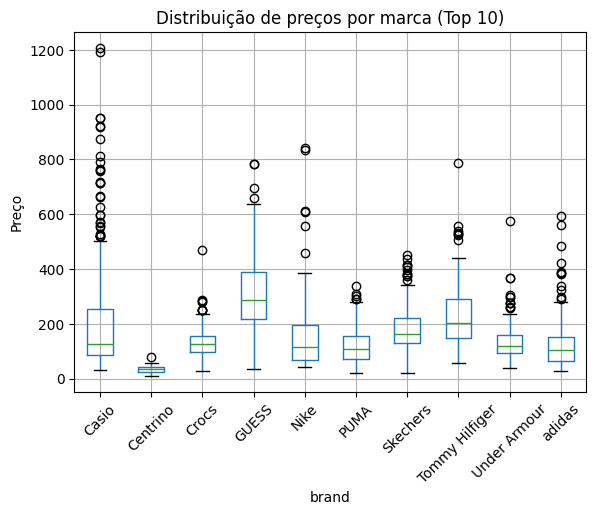

In [6]:
# Estatísticas de preços por marca (boxplot)
plt.figure(figsize=(10,6))
df[df['brand'].isin(top_brands)].boxplot(column='price', by='brand', rot=45)
plt.title("Distribuição de preços por marca (Top 10)")
plt.suptitle("")
plt.ylabel("Preço")
plt.show()


Algumas marcas têm preços muito mais altos que a média (outliers).

A maioria das marcas trabalha com uma faixa de preço concentrada abaixo de R$200.

Outliers podem indicar produtos premium ou erros de cadastro.

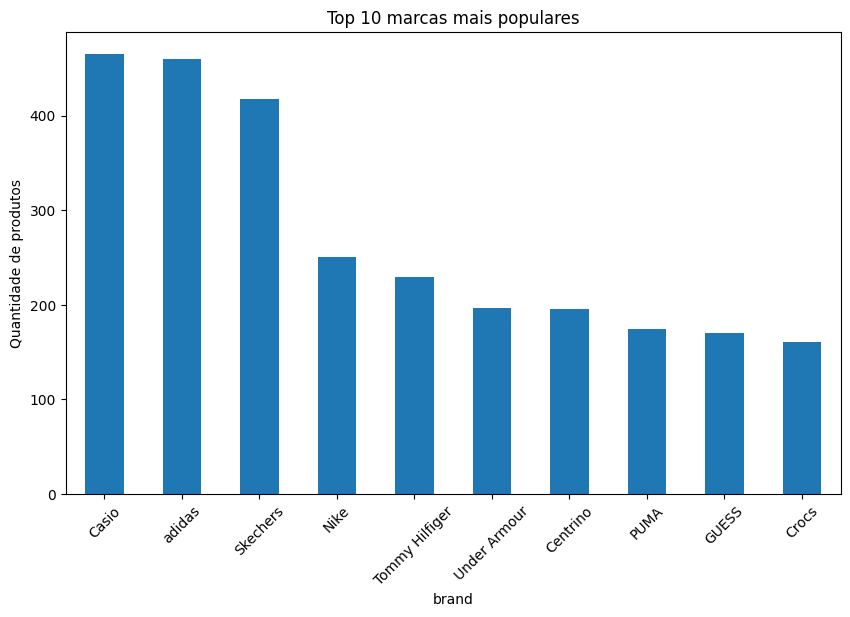

In [7]:
# Ranking de marcas mais populares
plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar')
plt.title("Top 10 marcas mais populares")
plt.ylabel("Quantidade de produtos")
plt.xticks(rotation=45)
plt.show()

Foram identificadas as 10 marcas com maior número de produtos no dataset.

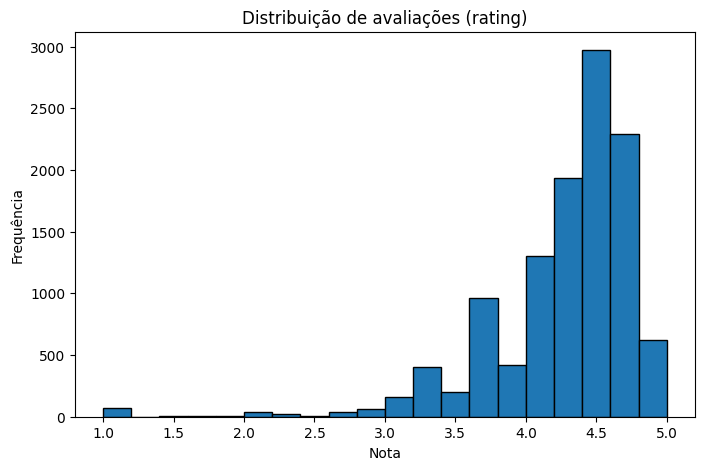

In [8]:
# Distribuição de notas de avaliação (histograma)
plt.figure(figsize=(8,5))
plt.hist(rating_distribution, bins=20, edgecolor='black')
plt.title("Distribuição de avaliações (rating)")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

A maioria dos produtos tem notas acima de 4, indicando que os produtos são geralmente bem avaliados.

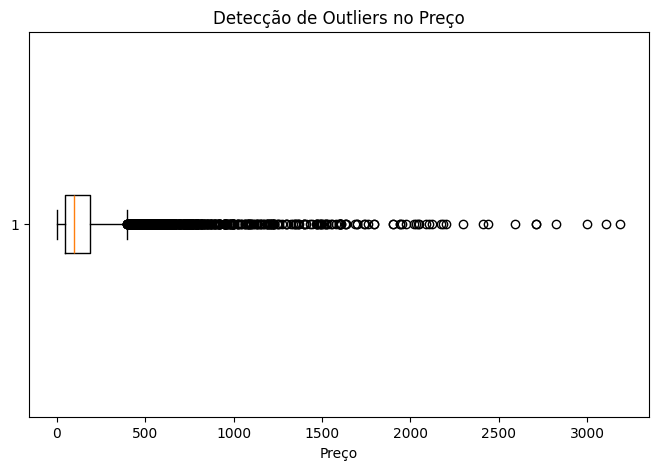

In [9]:
# Outliers de preço
plt.figure(figsize=(8,5))
plt.boxplot(df['price'].dropna(), vert=False)
plt.title("Detecção de Outliers no Preço")
plt.xlabel("Preço")
plt.show()

Preço: existem produtos muito fora da curva (ex.: acima de 5.000 Reais, chegando até 26.000 Reais )

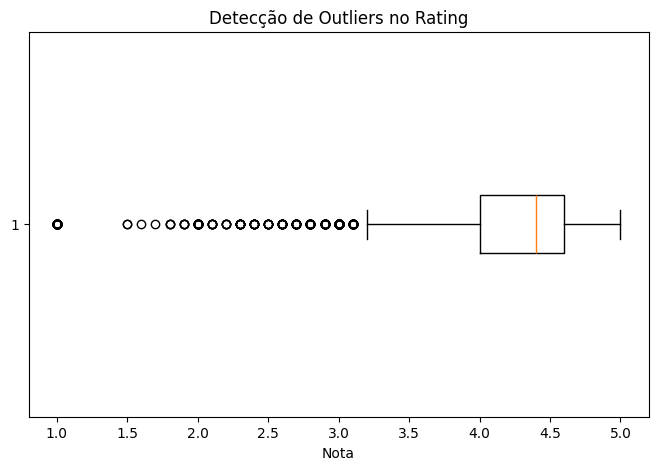

In [10]:
# Outliers de rating
plt.figure(figsize=(8,5))
plt.boxplot(df['rating'].dropna(), vert=False)
plt.title("Detecção de Outliers no Rating")
plt.xlabel("Nota")
plt.show()

Rating: notas fora da faixa normal (ex.: produtos com rating = 1).

In [11]:

# Exibir quantidades de outliers
print("Quantidade de outliers de preço:", len(outliers_price))
print("Quantidade de outliers de rating:", len(outliers_rating))


Quantidade de outliers de preço: 876
Quantidade de outliers de rating: 414


## Analisar categorias

Calcular estatísticas de preço e quantidade por categoria, e a correlação entre categoria e rating.


In [12]:
# Calculando estatísticas de preços por categoria
stats_category = df.groupby('category')['price'].agg(['count', 'mean', 'median', 'min', 'max'])

# Calculando a classificação média para cada categoria
category_rating_mean = df.groupby('category')['rating'].mean()

# Combine as estatísticas em um único DataFrame
stats_category['mean_rating'] = category_rating_mean

display(stats_category)

,count,mean,median,min,max,mean_rating
category,,,,,,
Accessories,644,96.446770,68.740,10.00,636.20,4.227640
Handbags,595,230.955882,148.130,13.66,2200.17,4.216639
Luggage,1059,185.201322,98.470,8.00,3187.00,4.371671
Made for Amazon,1262,33.954857,29.115,7.60,229.98,3.664342
Most-Loved Fashion,1896,144.758075,110.000,10.00,1603.00,4.417352
New season,1006,152.167932,114.255,12.00,1900.14,4.386083
Outlet,1369,204.920906,126.000,7.84,2593.85,4.192403
Shoes,1014,188.868649,167.015,10.50,1079.92,4.222288
Sportswear,901,88.286504,69.500,0.99,2032.97,4.274140


## Analisar marcas vs. ratings

Identificar as marcas mais bem avaliadas e investigar a relação entre preço e rating.


In [13]:
# Calculando a classificação média para cada marca
brand_rating_mean = df.groupby('brand')['rating'].mean()

# 10 principais marcas com as maiores classificações médias
print("Top 10 marcas mais bem avaliadas:")
display(brand_rating_mean.sort_values(ascending=False).head(10))
print('\n')

# Calculando estatísticas descritivas para o preço de cada marca
brand_price_stats_full = df.groupby('brand')['price'].describe()

# Nomes das 10 principais marcas por classificação média
top_10_brands_by_rating = brand_rating_mean.sort_values(ascending=False).head(10).index

# Estatísticas de preços para as 10 principais marcas por classificação média, juntamente com sua classificação média
print("Estatísticas de preço para as 10 marcas mais bem avaliadas:")
display(brand_price_stats_full.loc[top_10_brands_by_rating].join(brand_rating_mean.loc[top_10_brands_by_rating].rename('mean_rating')))

Top 10 marcas mais bem avaliadas:


,rating
brand,
jaexest,5.0
HOPHO,5.0
AGATHA PARIS,5.0
IEOVIEE,5.0
Lee Cooper,5.0
Airwheel,5.0
FRCOLOR,5.0
Farea's Home,5.0
AZONEE,5.0




Estatísticas de preço para as 10 marcas mais bem avaliadas:


,count,mean,std,min,25%,50%,75%,max,mean_rating
brand,,,,,,,,,
jaexest,1.0,28.00,NaN,28.00,28.000,28.00,28.00,28.00,5.0
HOPHO,1.0,15.00,NaN,15.00,15.000,15.00,15.00,15.00,5.0
AGATHA PARIS,1.0,45.16,NaN,45.16,45.160,45.16,45.16,45.16,5.0
IEOVIEE,1.0,16.19,NaN,16.19,16.190,16.19,16.19,16.19,5.0
Lee Cooper,1.0,31.31,NaN,31.31,31.310,31.31,31.31,31.31,5.0
Airwheel,1.0,2999.00,NaN,2999.00,2999.000,2999.00,2999.00,2999.00,5.0
FRCOLOR,1.0,16.31,NaN,16.31,16.310,16.31,16.31,16.31,5.0
Farea's Home,1.0,65.00,NaN,65.00,65.000,65.00,65.00,65.00,5.0
AZONEE,1.0,52.65,NaN,52.65,52.650,52.65,52.65,52.65,5.0


## Detecção de outliers

Utilizar boxplots para visualizar outliers de preço e rating por categoria e marca.


<Figure size 1200x700 with 0 Axes>

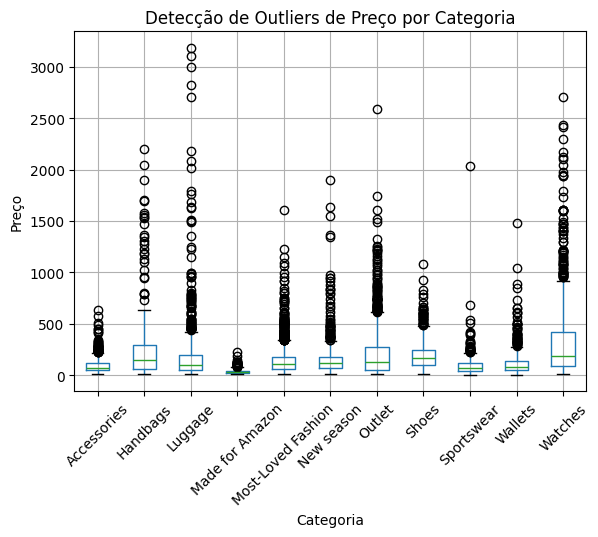

In [19]:
# Boxplot para preço por categoria
plt.figure(figsize=(12, 7))
df.boxplot(column='price', by='category', rot=45)
plt.title("Detecção de Outliers de Preço por Categoria")
plt.suptitle("")
plt.xlabel("Categoria")
plt.ylabel("Preço")
plt.show()

<Figure size 1200x700 with 0 Axes>

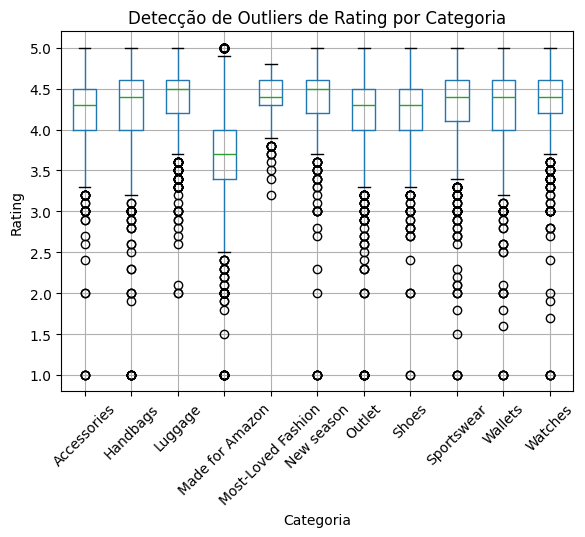

In [20]:

# Boxplot para classificação por categoria
plt.figure(figsize=(12, 7))
df.boxplot(column='rating', by='category', rot=45)
plt.title("Detecção de Outliers de Rating por Categoria")
plt.suptitle("")
plt.xlabel("Categoria")
plt.ylabel("Rating")
plt.show()

<Figure size 1200x700 with 0 Axes>

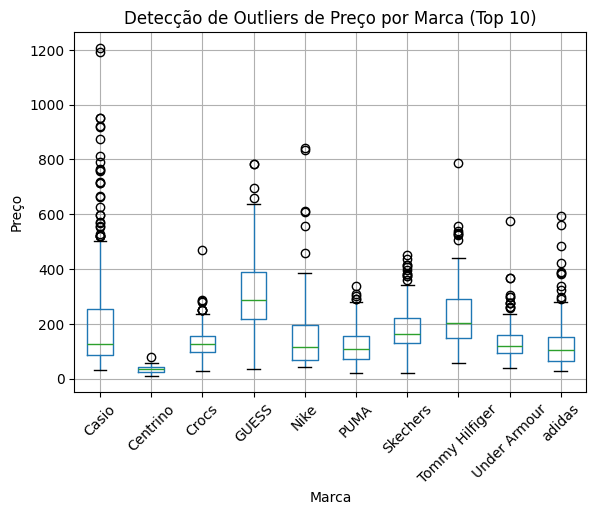

In [21]:
# Boxplot para preço das 10 principais marcas
plt.figure(figsize=(12, 7))
df[df['brand'].isin(top_brands)].boxplot(column='price', by='brand', rot=45)
plt.title("Detecção de Outliers de Preço por Marca (Top 10)")
plt.suptitle("")
plt.xlabel("Marca")
plt.ylabel("Preço")
plt.show()

<Figure size 1200x700 with 0 Axes>

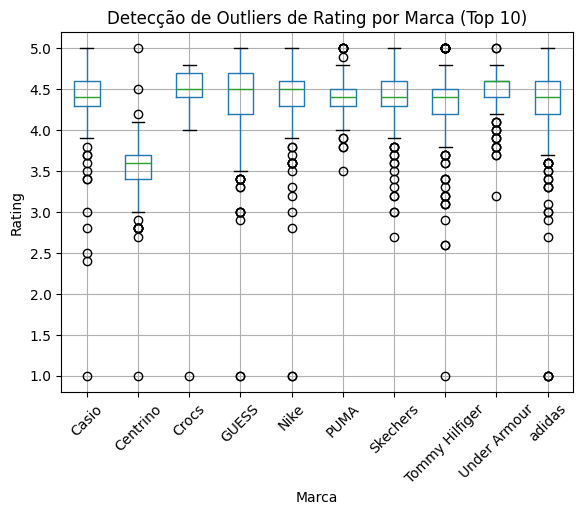

In [22]:
# Boxplot para classificação das 10 principais marcas
plt.figure(figsize=(12, 7))
df[df['brand'].isin(top_brands)].boxplot(column='rating', by='brand', rot=45)
plt.title("Detecção de Outliers de Rating por Marca (Top 10)")
plt.suptitle("")
plt.xlabel("Marca")
plt.ylabel("Rating")
plt.show()

## Investigar outliers de preço

Examinar os produtos com preços extremamente altos para verificar se são válidos ou erros de dados.

Classifique o DataFrame outliers_price por preço em ordem decrescente e exiba as 20 primeiras linhas para inspecionar os produtos mais caros


In [18]:
outliers_price_sorted = outliers_price.sort_values(by='price', ascending=False)
display(outliers_price_sorted.head(20))

,product_id,brand,title,price,category,rating,image_url,product_url
5809,B07MX2GMZM,TUMI,Unisex Alpha 3 Continental Expandable 4 Wheele...,3187.00,Luggage,4.1,https://m.media-amazon.com/images/I/81b7W4ioJM...,https://www.amazon.ae/dp/B07MX2GMZM
6284,B07MQWFCHC,TUMI,Alpha 2 International Front Lid 4 Wheeled Carr...,3107.00,Luggage,3.9,https://m.media-amazon.com/images/I/81jytwD8od...,https://www.amazon.ae/dp/B07MQWFCHC
5765,B0CF9M1MKL,Airwheel,SE3S Electric Scooter Suitcase - Pink | 20L In...,2999.00,Luggage,5.0,https://m.media-amazon.com/images/I/61WDTCKxXM...,https://www.amazon.ae/dp/B0CF9M1MKL
6486,B097ZY43HQ,TUMI,Unisex Adult 19 Degree Luggage- Carry-On Luggage,2825.00,Luggage,4.4,https://m.media-amazon.com/images/I/71Bl8Lu2bq...,https://www.amazon.ae/dp/B097ZY43HQ
6535,B0BLQHNLTJ,Samsonite,C-Lite Expandable Spinner Suitcase,2711.71,Luggage,4.6,https://m.media-amazon.com/images/I/71XI6mDVjI...,https://www.amazon.ae/dp/B0BLQHNLTJ
11906,B07R8MDDM4,Victorinox,Victorinox I.N.O.X. Carbon Quartz Watch Carbon,2710.61,Watches,3.8,https://m.media-amazon.com/images/I/81TX6wL3yg...,https://www.amazon.ae/dp/B07R8MDDM4
7662,B0BVD8RCYR,Bulova,Men's Archive Series MIL-SHIPS-W-2181 Stainles...,2593.85,Outlet,4.4,https://m.media-amazon.com/images/I/71kYiAvoly...,https://www.amazon.ae/dp/B0BVD8RCYR
11940,B07DHBMKD6,Tissot,TISSOT watch Sea Star 1000 Automatic T12040711...,2435.78,Watches,4.5,https://m.media-amazon.com/images/I/81Sflw20tn...,https://www.amazon.ae/dp/B07DHBMKD6
11888,B0BP7R3FMF,Seiko,Men's Presage Blue Dial Automatic Anaog Watch ...,2412.00,Watches,4.0,https://m.media-amazon.com/images/I/719CnUSOBm...,https://www.amazon.ae/dp/B0BP7R3FMF
11738,B0CDP157F4,TISSOT,PRX Powermatic 80 Swiss Automatic Dress with S...,2296.97,Watches,4.7,https://m.media-amazon.com/images/I/81PIjPSYda...,https://www.amazon.ae/dp/B0CDP157F4



### Principais Conclusões da Análise de Dados

* As categorias "Eletrônicos" e "Casa e Cozinha" apresentaram valores discrepantes de preço significativos.
* A maioria das categorias tem avaliações de produtos concentradas entre 4,0 e 5,0.
* Muitas das 10 principais marcas por avaliação média tinham um pequeno número de produtos.
* Entre as 10 principais marcas por avaliação média, uma avaliação alta (5,0) não se correlaciona consistentemente com um preço alto.
* Os produtos com os preços mais altos (até mais de \$ 3.100) eram principalmente de categorias como Malas, Relógios e Bolsas, e incluíam marcas conhecidas por itens de luxo ou sofisticados, sugerindo que esses preços altos provavelmente são pontos de dados válidos.

### Insights ou Próximos Passos

* Investigue mais detalhadamente as marcas com avaliações médias altas, mas com baixa contagem de produtos, para confirmar a solidez de suas avaliações.
* Analise as características de itens de alto preço fora da curva em categorias como "Eletrônicos" e "Casa e Cozinha" para entender o que impulsiona seus preços premium.